## Chapter 9
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

Given a collection of n points, linear regression seeks to find the line which best approximates or fits the points, as shown in Figure 9.1. There are many reasons why we might want to do this. One class of goals involves simplification and compression: we can replace a large set of noisy data points in the xy-plane by a tidy line that describes them, as shown in Figure 9.1. This regression line is useful for visualization, by showing the underlying trend in the data and highlighting the location and magnitude of outliers.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random
import pandas as pd

from scipy.spatial import ConvexHull
from scipy import stats
from sklearn.metrics import mean_squared_error
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Figure 9.1  - Linear Regression graph

[ 2.96908677  0.08064795]


(-4, 4.6)

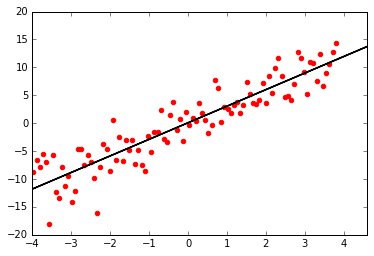

In [2]:
# Create a random noise
x1 = np.random.normal(size=200)
xs = np.linspace(x1.min()-1, x1.max()+1, 100)
x = xs
y = 3*(np.random.normal(0, 1, 100)+x)
plt.scatter(x, y , color='red')

#Find the regression line
regression = np.polyfit(x,y,1)
print regression
longerX = np.append(x, [5,-5])
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-4, 4.6)

### Figure 9.2  - Point and line duality
#### p = (a,b) -> p* = ax - b

Figure 9.2: Points are equivalent to lines under a duality transform. The point (4,8) in red (left) maps to the red line y = 4x − 8 on right. Both sets of three collinear points on the left correspond to three lines passing through the same point on right.

The distinction between points and lines proves trivial, because they both are really the same thing. In two-dimensional space, both points (s, t) and lines y = mx + b are defined by two parameters: {s, t} and {m, b}, respectively. Further, by an appropriate duality transformation, these lines are equivalent to points in another space. In particular, consider the transform that (s, t) ←→ y = sx − t.

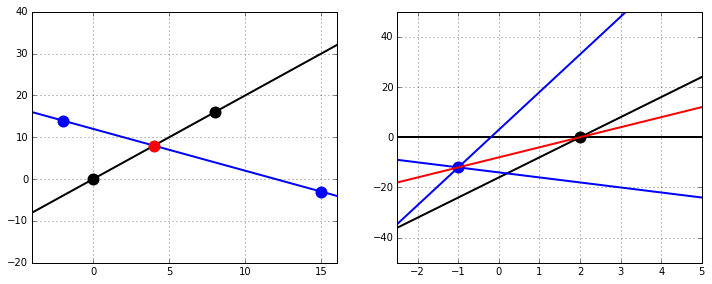

In [3]:
plt.figure(figsize=(12,4.5))

plt.subplot(121)
x = np.linspace(-10,16,500)
y = 2*x
y2 = -x+12
plt.plot(x, y, 'k-', x, y2, 'b-', linewidth=2)
plt.plot([0], [0], 'ko', [8],[16], 'ko', [-2], [14], 'bo', [15], [-3], 'bo', [4], [8], 'ro', markersize=12, markeredgewidth=0)
plt.xlim(-4,16)
plt.grid()

plt.subplot(122)
plt.plot(x, 0*x, 'k-', linewidth=2)
plt.plot(x, 8*x-16, 'k-', linewidth=2)
plt.plot([2], [0], 'ko', [-1], [-12], 'bo', markersize=12, markeredgewidth=0)
plt.plot(x, -2*x-14, 'b-', x, 15*x+3, 'b-', x, 4*x-8, 'r-', linewidth=2)
plt.xlim(-2.5,5)
plt.ylim(-50,50)
plt.grid()

### Figure 9.3  - Residual error

The residual error of a fitted line f(x) is the difference between the predicted and actual values. As shown in Figure 9.3, for a particular feature vector xi and corresponding target value yi, the residual error ri is defined:
ri = yi − f(xi).
This is what we will care about, but note that it is not the only way that error might have been defined. The closest distance to the line is in fact defined by the perpendicular-bisector through the target point. But we are seeking to forecast the value of yi from xi, so the residual is the right notion of error for our purposes.
Least squares regression minimizes the sum of the squares of the residuals of all points. This metric has been chosen because (1) squaring the residual ignores the signs of the errors, so positive and negative residuals do not offset each other, and (2) it leads to a surprisingly nice closed form for finding the coefficients of the best-fitting line.


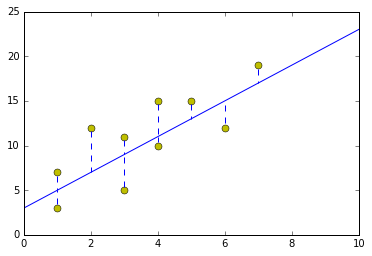

In [4]:
x = np.linspace(0, 10, 100)
y = 2*x+3
#distance the dashed line is into the circle
s = 0.4

plt.plot(x, y)
plt.plot([1, 1, 2, 3, 3, 4, 4, 5, 6, 7],[7, 3, 12, 5, 11, 15, 10, 15, 12, 19], 'yo', markersize=7)
plt.plot([1, 1], [7-s, 5], 'b-', [1, 1], [3+s, 5], 'b-', \
         [2, 2], [12-s, 7], 'b-', [3, 3], [5+s, 9], 'b-', \
         [3, 3], [11-s, 9], 'b-', [4,4], [15-s, 11], 'b-', \
         [4,4], [10+s, 11], 'b-', [5, 5], [15-s, 13], 'b-',\
         [6, 6], [12+s+0.1, 15], 'b-', [7, 7], [19-s, 17], 'b-', linestyle='dashed')

Figure 9.3: The residual error in least squares is the projection of yi − f(X) down to X, not the shortest distance between the line and the point.


### Figure 9.4 Regression line and outlier

The least squares regression line is defined by w = (A^T A)^−1 A^T b, in which w is the weights vector and b is the y-intercept or bias. This means that solving regression problems reduces to inverting and multiplying matrices. This formula works fine for small matrices, but the gradient descent algorithm  will prove more efficient in practice.

Figure 9.4 shows the best-fitting regression line with (left) and without (right) an outlier point in the lower right. The fit on the right is much better: with an r^2 of 0.917 without the outlier, compared to 0.548 with the outlier.
Therefore identifying outlying points and removing them in a principled way can yield a more robust fit. The simplest approach is to fit the entire set of points, and then use the magnitude of the residual ri = (yi − f(xi))^2 to decide whether point pi is an outlier. It is important to convince yourself that these points really represent errors before deleting them, however. Otherwise you will be left with an impressively linear fit that works well only on the examples you didn’t delete.

r2 = 0.91654158689
r1 = 0.548282726023


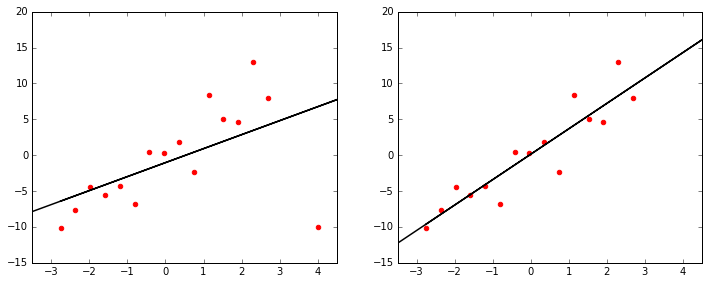

In [5]:
plt.figure(figsize=(12,4.5))

#The right graph without an outlier.
plt.subplot(122)
# Create a random 15 points
np.random.seed(7)
x1 = np.random.normal(size=10)
x = np.linspace(x1.min()-1, x1.max()+1, 15) 
y = 3*(np.random.normal(0, 1, 15)+x)
plt.scatter(x, y , color='red')

#Find the regression line
regression = np.polyfit(x,y,1)
longerX = np.append(x, [5,-5]) #this makes the regression line longer
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-3.5,4.5)
plt.ylim(-15, 20)
#The correlation coefficient value r.
r1 = stats.pearsonr(x, y)
print 'r2 =', r1[0]

#The left graph with an outlier
plt.subplot(121)
#plot the 15 points with an outlier.
x1 = np.append(x, [4])
y1 = np.append(y, [-10])
plt.scatter(x1, y1 , color='red')

#Find the regression line
regression = np.polyfit(x1,y1,1)
longerX = np.append(x1, [5,-5]) #this makes the regression line longer
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-3.5,4.5)
plt.ylim(-15, 20)
#The correlation coefficient value r.
r2 = stats.pearsonr(x1, y1)
Figure 9.4: Removing outlier points (left) can result in much more meaningful fits (right).print 'r1 =', r2[0]

Figure 9.4: Removing outlier points (left) can result in much more meaningful fits (right).

### Fitting Non-Linear Functions Figure 9.5

Linear regression fits lines, not high-order curves. But we can fit quadratics by adding an extra variable with the value x^2 to our data matrix, in addition to x. The model
\begin{equation}
y = w_0 +w_1x+w_2x^2 
\end{equation}
is quadratic, but note that it is a linear function of its non-linear input values. We can fit arbitrarily- complex functions by adding the right higher-order variables to our data matrix, and forming linear combinations of them. We can fit arbitrary polynomials and exponentials/logarithms by explicitly including the right component variables in our data matrix, such as √x, lg(x), x^3, and 1/x.

However, explicit inclusion of all possible non-linear terms quickly becomes intractable. Adding all powers xi for 1 ≤ i ≤ k will blow up the data matrix by a factor of k. Including all product pairs among n variables is even worse, making the matrix n(n + 1)/2 times larger. 

One must be judicious about which non- linear terms to consider for a role in the model.

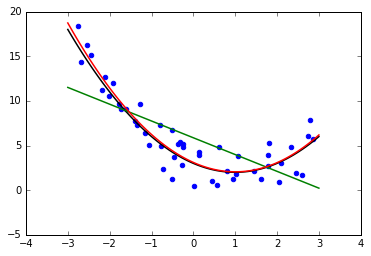

In [6]:
#Plot a quadratic function x^2 - 2*x + 3
x1 = np.linspace(-3,3,100)
y1 = x1*x1 - 2*x1 + 3
plt.plot(x1, y1, 'k-', linewidth=1.5)

# Create random points
np.random.seed(7)
x = []
y=[]
for i in range(0,50):
    a = np.random.uniform(-3, 3)
    b = a*a - 2*a + 3
    c = np.random.uniform(-3,3)
    x.append(a)
    y.append(b+c)

plt.scatter(x, y , color='blue')

#Find the regression line mx + c and curve a*x*x + b*x + c
regline = np.polyfit(x,y,1)
plt.plot(x1, regline[0]*x1 + regline[1], 'g-', linewidth=1.5)
regcurve = np.polyfit(x,y,2)
plt.plot(x1, regcurve[0]*x1*x1 + regcurve[1]*x1 + regcurve[2], 'r-', linewidth=1.5)

Figure 9.5: Higher-order models (red) can lead to better fits than linear models (green).

##  9.4 Regression as Parameter Fitting
The closed form formula for linear regression, w = (AT A)−1AT b, is concise and elegant. However, it has some issues which make it suboptimal for computation in practice. Matrix inversion is slow for large systems, and prone to numerical instability. Alternatively, modelling linear regression as a parameter fitting problem, and deploys search algorithms to find the best values that it can for these parameters, leads to faster algorithms, more robust numerics, and can be readily adapted to other learning algorithms. Seek seek the line y = f(x) which minimizes the sum of the squared errors over all training points, i.e. the coefficient vector w that minimizes

\begin{equation}
\sum_{i=1}^n(y_i−f(x_i))^2
\end{equation}
where 

\begin{equation}
f(x)=w_0+\sum_{i=1}^m w_ix_i
\end{equation}

Every possible pair of values for (w0, w1) will define some line, but we really want the values that minimize the error or loss function J(w0,w1). We might try a bunch of random value pairs, and keep the one which scores best, i.e. with minimum loss J(w0,w1). But it seems very unlikely to stumble on the best or even a decent solution. To search more systematically, we will have to take advantage of a special property lurking within the loss function.

The upshot of the above discussion is that the loss function J(w0,w1) defines a surface in (w0, w1)-space, with our interest being in the point in this space with smallest z value, where z = J(w0,w1).

Let’s start by making it even simpler, forcing our regression line to pass through the origin by setting w0 = 0. This leaves us only one free parameter to find, namely the slope of the line w1. Certain slopes will do a wildly better job of fitting the points shown in Figure 9.6 (left) than others, with the line y = x clearly being the desired fit.
Figure 9.6 (right) shows how the fitting error (loss) varies with w1. The interesting thing is that the error function is shaped sort of like a parabola. It hits a single minimum value at the bottom of the curve. The x-value of this minimum point defines the best slope w1 for the regression line, which happens to be w1 = 1.
Any convex surface has exactly one local minima, just keep walking in a downward direction until you hit it. 



### Figure 9.6 Left

Summary of Fig 9.6
1. Get the points (plot y = x line and make random points around the line by adding noise to the points.)
2. Find the zscore of the points. (x-xmean/xstd, y-ymean/ystd)
3. for angle 0 to 90, find the mean squared error of the line to the points.
4. plot (angle, error)

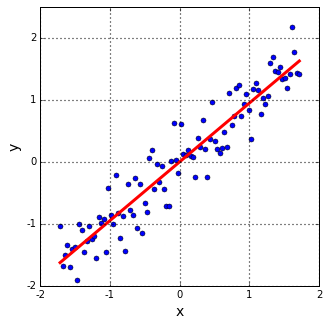

In [7]:
## Make Points

np.random.seed(7)
x = np.linspace(0,10, 100)
y = np.random.normal(0,1, 100)+x

xmean = np.mean(x)
xstd = np.std(x)
ymean = np.mean(y)
ystd = np.std(y)

## Compute the zscores
xz = []
yz = []
for i, j in zip(x, y):
    xz.append((i-xmean)/float(xstd))
    yz.append((j-ymean)/float(ystd))
    
plt.figure(figsize=(5,5))

plt.plot(xz, yz, 'bo', markersize=5)
regline = np.polyfit(xz, yz, 1)
plt.plot(xz, [k*regline[0] for k in xz], 'r-', linewidth=3)

plt.grid(linewidth=1.2)
plt.xticks([-2,-1,0,1,2], ['-2','-1','0','1', '2'])
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1', '2'])
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

### Figure 9.6 Right

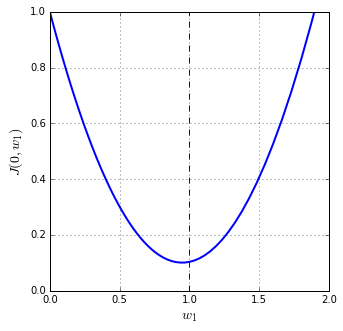

In [8]:
errorlst = []
label = []
#for angle 0 ~ 89 bc when a = 90, it is a vertical line.
for a in range(0,90, 1):
    # slope = y/x
    slope = math.sin(math.radians(a))/float(math.cos(math.radians(a)))
    label.append(slope)
    error = mean_squared_error(yz, [ slope*k for k in xz])
    errorlst.append(error)

#Slope vs. errorlst
plt.figure(figsize=(5,5))
plt.plot(label, errorlst, 'b-', linewidth=2)
plt.plot([1,1],[0,1], '--')
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel(r"$w_1$", fontsize=14)
plt.ylabel(r"$J(0,w_1)$", fontsize=14)
plt.grid()

Figure 9.6: The best possible regression line y = w1x (left) can be found by identifying the w1 that minimizes the error of the fit, defined by the minima of a convex function.


How can we tell whether a given function is convex? The derivative f′(x) of a function f(x), which corresponds to the value of the slope of the surface of f(x) at every point. Whenever this derivative was zero, it meant that you had hit some point of interest, be it a local maxima or a minima. Recall the second derivative f′′(x), which was the derivative function of the derivative f′(x). Depending upon the sign of this second derivative f′′(x), you could identify whether you hit a maxima or minima.

Figure 9.7 shows the surface we get for the full regression problem in (w0, w1)- space. The loss function J(w0,w1) looks like a bowl with a single smallest z- value, which defines the optimal values for the two parameters of the line. The great thing is that this loss function J(w0,w1) is again convex, and indeed it remains convex for any linear regression problem in any number of dimensions.


### Figure 9.7
#### Made with the help of this tutorial: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

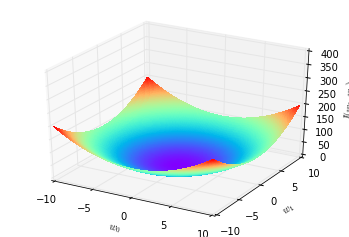

In [9]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
R = 1*((X**2)/(1) + (Y**2)/1)
Z = R

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0,400)
ax.set_zticks(np.arange(0,450,50))
ax.set_xlabel(r"$w_0$")
ax.set_ylabel(r"$w_1$")
ax.set_zlabel(r"$J(w_0, w_1)$")

### Figure 9.8
The tangent line approximates the derivative.

[]

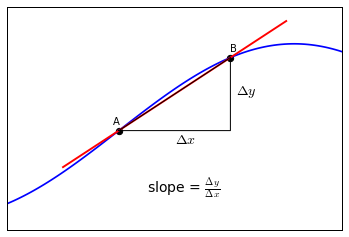

In [10]:
x = np.linspace(-1,2,100)
y = 0.7*np.sin(x)
plt.plot(x,y, linewidth='1.7')

#the tangent line
x0 = 0.0
x1 = 1.0
slope=(0.7*np.sin(x1)-0.7*np.sin(x0))/(x1-x0)
xline = np.linspace(x0-0.5, x1+0.5, 100)
plt.plot(xline, slope*xline, 'r-', linewidth='1.9')

#the points
plt.scatter([x0,x1],[0.7*np.sin(x0), 0.7*np.sin(x1)], s=40, color='black')
plt.text(x0-0.05, 0.7*np.sin(x0)+0.05, 'A')
plt.text(x1, 0.7*np.sin(x1)+0.05, 'B')

#the triangle
plt.plot([x0,x1,x1,x0], [0.7*np.sin(x0), 0.7*np.sin(x1),0.7*np.sin(x0), 0.7*np.sin(x0)], color='black')
plt.text(x0+0.5, 0.7*np.sin(x0)-0.1, r'$\Delta x$', fontsize=14)
plt.text(x1+0.05, 0.7*np.sin(x1)-0.3, r'$\Delta y$', fontsize=14)
plt.text(x0+0.25, 0.7*np.sin(x0)-0.5, r'slope = $\frac{\Delta y}{\Delta x}$', fontsize=14)

plt.xlim(-1,2)

#Hide the x and y axis.
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

### Figure 9.11 - Bumpy surface

Gradient descent search operates in rounds: find the best direction, take a step, and then repeat until we hit the target. The size of our step is called the learning rate, and it defines the speed with which we find the minima. Taking tiny baby steps and repeatedly consulting the map (i.e. partial derivatives) will indeed get us there, but only very slowly.
However, bigger isn’t always better. If the learning rate is too high, we might jump past the minima,

Also the shape of the surface makes a big difference as to how successfully gradient descent search finds the global minimum. 

Even worse things happen when our loss function is not convex, meaning there can be many local minima, as in Figure 9.11. Now this can’t be the case for linear regression, but does happen for many other interesting machine learning problems we will encounter. Local optimization can easily get stuck in local minima for non-convex functions.

Gradient descent search remains useful in practice for non- convex optimization, although it no longer guarantees an optimal solution. Instead, we should start repeatedly from different initialization points, and use the best local minima we find to define our solution.


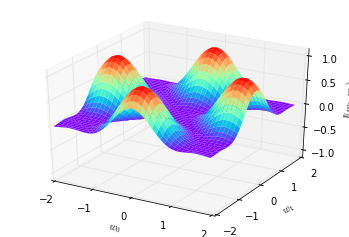

In [11]:
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sin(X) + np.cos(Y)
R = ((np.cos(X))**4+(np.cos(Y))**4-2*((np.cos(X))**2)*((np.cos(Y))**2))
Z = R
#Equation from http://stackoverflow.com/questions/24045379/matplotlib-3d-surface-of-bumpy-function-does-not-work

fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow, linewidth=0)
ax.set_zlim(-1.1,1.1)
ax.set_xlabel(r"$w_0$")
ax.set_ylabel(r"$w_1$")
ax.set_zlabel(r"$J(w_0, w_1)$")
ax.set_xticks(np.arange(-2,2.1,1))
ax.set_yticks(np.arange(-2,2.1,1))

Figure 9.11: Gradient descent search finds local minima for non-convex surfaces, but does not guarantee a globally optimum solution.

## Classification and Logistic Regression

Classification is the problem of predicting the right label for a given input record. The task differs from regression in that labels are discrete entities, not continuous function values. Trying to pick the right answer from two possibilities might seem easier than forecasting open-ended quantities, but it is also a lot easier to get dinged for being wrong.

We can apply linear regression to classification problems by converting the class names of training examples to numbers. For now, let’s restrict our attention to two class problems, or binary classification. Then generalize this to multi-class problems

We might consider training a regression line f(x) for our feature vector x where the target values are these 0/1 labels, as shown in Figure 9.12. There is some logic here. Instances similar to positive training examples should get lower scores than those closer to negative instances. We can threshold the value returned by f(x) to interpret it as a label: f(x) ≤ 0.5 means that x is positive. When f(x) > 0.5 we instead assign the negative label.

### Figure 9.12

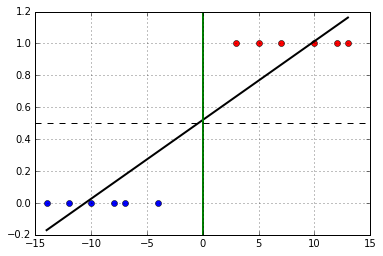

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = [-14,-12, -10, -8, -7, -4]
x1 = [ 3, 5, 7, 10, 12, 13]
y = [0]*len(x)
y1 = [1]*len(x1)
regline = np.polyfit(x+x1,y+y1,1)

plt.plot(x,y, 'bo', x1,y1,'ro')
plt.plot(x+x1, [regline[0]*i + regline[1] for i in x+x1], 'k-', linewidth=2)
plt.plot([0,0],[1.2,-0.2], 'g-', linewidth=2)
plt.plot([-15,15],[0.5,0.5], 'k--')

plt.ylim(-0.2, 1.2)
plt.grid()

Figure 9.12: The optimal regression line cuts through the classes, even though a perfect separator line (x = 0) exists.


## logit function f(x), 

\begin{equation}
f(x)=\frac1{1+e^{−cx}}
\end{equation}


This function takes as input a real value −∞ ≤ x ≤ ∞, and produces a value ranging over [0,1], i.e. a probability. Figure 9.15 plots the logit function f(x), which is a sigmoidal curve: flat at both sides but a steep rise in the middle.


### Figure 9.15 - The logit function 

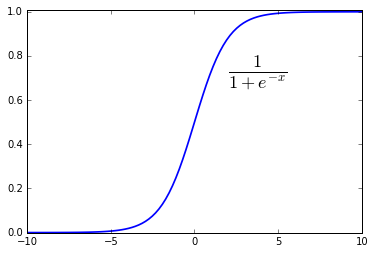

In [13]:
c = 1
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-c*x))

plt.plot(x,y, linewidth='1.7')
plt.ylim(-0.001,1.01)
plt.text(2, 0.7, r'$\frac{1}{1+e^{-x}}$', fontsize=26, fontweight='bold')

Figure 9.15: The logit function maps a score to a probability.

The important cases are those at the midpoint and endpoints. Logit says that f(0) = 1/2, meaning that the label of a point on the boundary is essentially a coin toss between the two possibilities. This is as it should be. More unam- biguous decisions can be made the greater our distance from this boundary, so f(∞) = 1 and f(−∞) = 0.
Our confidence as a function of distance is modulated by the scaling constant c. A value of c near zero makes for a very gradual transition from positive to negative. In contrast, we can turn the logit into a staircase by assigning a large enough value to c, meaning that small distances from the boundary translate into large increases in confidence of classification.
We need three things to use the logit function effectively for classification:
• Extending f(x) beyond a single variable, to a full (m − 1)-dimensional
input vector x.
• The threshold value t setting the midpoint of our score distribution (here
zero).
• The value of the scaling constant c regulating the steepness of the transi- tion.
We can achieve all three by fitting a linear function h(x,w) to the data,
where

\begin{equation}
h(x, w) = w_0 + \sum_{i=1}^{m-1}􏰊 w_i · x_i
\end{equation}

which can then be plugged into the logistic function to yield the classifier:

\begin{equation}
f(x)=\frac1{1+e^{−h(x,w)}}
\end{equation}

Note that the coefficients of h(x, w) are rich enough to encode the threshold (t = w0) and steepness (c is essentially the average of w1 through wn−1) parameters. The only remaining question is how to fit the coefficient vector w to the training data. Recall that we are given a zero/one class label yi for each input vector xi, where 1 ≤ i ≤ n. We need a penalty function that ascribes appropriate costs to returning f(xi) as the probability that the class yi is positive, i.e. yi = 1.

The logarithmic function cost(xi,1) = −log(f(xi)) turns out to be a good penalty function when yi = 1.
\begin{equation}
y=log_b x → b^y =x.
\end{equation}

As shown in Figure 9.16, log(1) = 0 for any reasonable base, so zero penalty is charged when f(xi) = 1, which is as it should be for correctly identifying yi = 1. Since blogb x = x, log(x) → −∞ as x → 0. This makes cost(xi,1) = −log(f(xi)) an increasingly severe penalty the more we misclassify yi.

Now consider the case where yi = 0. We want to punish the classifier for high values of f(xi), i.e. more as f(xi) → 1. A little reflection should convince you that the right penalty is now cost(xi, 0) = − log(1 − f(xi)).

To tie these together, note what happens when we multiply cost(xi, 1) times yi. There are only two possible values, namely yi = 0 or yi = 1. This has the desired effect, because the penalty is zeroed out in the case where it does not apply. Similarly, multiplying by (1 − yi) has the opposite effect: zeroing out the penalty when yi = 1, and applying it when yi = 0. Multiplying the costs by the appropriate indicator variables enables us to define the loss function for logistic regression as an algebraic formula:

\begin{equation}
J(w) = \frac1n \sum_{i=1}^n cost(f(x_i, w), y_i)
\end{equation}

\begin{equation}
J(w) = \frac1n [\sum_{i=1}^n y_i log f(x_i, w) + (1 - y_i) log(1 - f(x_i, w))]
\end{equation}

### Figure 9.16

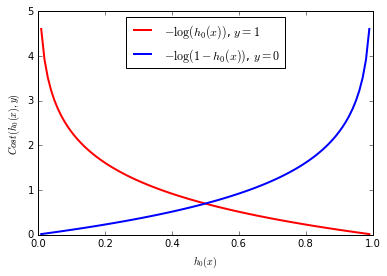

In [14]:
x = np.linspace(0.01,0.99, 100)
y1 = -np.log(x)
y2 = -np.log(1-x)

plt.plot(x, y1, 'r-', label=r"$-\log(h_0(x))$, $y=1$", linewidth=2)
plt.plot(x, y2, 'b-', label=r"$-\log(1-h_0(x))$, $y=0$", linewidth=2)

plt.xlabel(r'$h_0(x)$')
plt.ylabel(r"$Cost(h_0(x), y)$")
plt.legend(loc="upper center")

### Figure 9.17
#### The source of the data set https://www.statcrunch.com/app/index.php?dataid=1406047
You can look at figure 10.11, which is another version of this figure but using K-means.

Figure 9.17: The logistic regression classifier best separating men and women in weight–height space. The red region contains 229 women and only 63 men, while the blue region contains 223 men to 65 women.

It is best when the colors are selected to have mnemonic values to link nat- urally to the class at hand. Losses should be printed in red ink, environmental causes associated with green, nations with their flag colors, and sports teams with their jersey colors. Coloring points to represent males as blue and females as red offers a subtle clue to help the viewer interpret a scatter plot, as shown in Figure 9.17.


[80.83958333333334, 167.02430555555554]
0.4792877171682132


/Users/manal/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

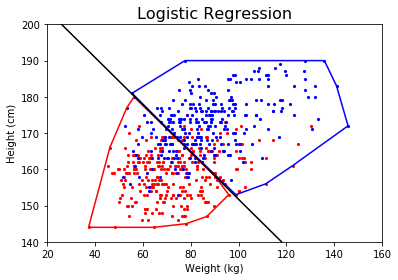

In [3]:
path = "weight.xls"
csv_data = pd.ExcelFile(path).parse('Sheet1')
female = csv_data[(csv_data['Gender'] == 0) & (csv_data['Age'] >=800) & (csv_data['Age'] <=900)] #Age is by the number of months. 20~40
male = csv_data[(csv_data['Gender'] == 1) & (csv_data['Age'] >=800) & (csv_data['Age'] <= 900)]
y = np.append(female["Height"], male["Height"])
x = np.append(female["Weight"], male["Weight"])
z = [[i,j] for i,j in zip(x,y)]

plt.figure(figsize=(6,4))

#Log Reg
f = [0]*len(female)
m = [1]*len(male)
k = np.append(f,m)
reg = LogisticRegression()
reg.fit(z,k)
label = reg.predict(z)

#Draw the convex hull.
division1 = [i for i,c in zip(z, label) if c == 1]
division1= np.array(division1)
division2 = [i for i,c in zip(z, label) if c == 0]
division2 = np.array(division2)
hull1 = ConvexHull(division1)
hull2 = ConvexHull(division2)

# to make the line come back to the first point, I appended the first vertice to it at last.
plt.plot(np.append(division1[hull1.vertices, 0], division1[hull1.vertices[0],0]), \
         np.append(division1[hull1.vertices,1], division1[hull1.vertices[0],1]),'b-', linewidth=1.5)
plt.plot(np.append(division2[hull2.vertices, 0], division2[hull2.vertices[0],0]), \
         np.append(division2[hull2.vertices,1], division2[hull2.vertices[0],1]),'r-', linewidth=1.5)
plt.scatter(female['Weight'], female['Height'], c='red', s=10, lw=0)
plt.scatter(male['Weight'], male['Height'], c='blue', s=10, lw=0)

#Find the perpendicular bisector
#first find the centroids
cx1 = np.sum(division1[:,0])/len(division1)
cy1 = np.sum(division1[:,1])/len(division1)
cx2 = np.sum(division2[:,0])/len(division1)
cy2 = np.sum(division2[:,1])/len(division1)

midpoint = [(cx1+cx2)/2.0, (cy1+cy2)/2.0]
print (midpoint)
lineslope = (cy2-cy1)/(cx2-cx1)
print (lineslope)
perslope = -1/lineslope
perx = [20,120]
pery = perslope*(perx - midpoint[0]) + midpoint[1]

#Line separating the two
plt.plot([26,118], [200,140], 'k-')

plt.xlim(20,160)
plt.ylim(140,200)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Logistic Regression", fontsize=16)